In [1]:
#NEW ATTEMPT Below 

In [2]:
# Load data
import pandas as pd
df = pd.read_csv('../Data/aug_labelled.csv')

In [3]:
import spacy
from spacy import tokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
import re
import nltk
from nltk.corpus import wordnet
from nltk.stem.porter import PorterStemmer

# Load the sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Load spacy object
nlp = spacy.load('en_core_web_sm')

# Preprocess the tweets
stop_words = set(stopwords.words('english'))

def clean_tweet(tweet):
    if type(tweet) == float:
        return ""
    temp = tweet.lower()
    temp = re.sub("'", "", temp) # to avoid removing contractions in english
    temp = re.sub("@[A-Za-z0-9_]+","", temp)
    temp = re.sub("#[A-Za-z0-9_]+","", temp)
    temp = re.sub(r'http\S+', '', temp)
    temp = re.sub('[()!?]', ' ', temp)
    temp = re.sub('\[.*?\]',' ', temp)
    temp = re.sub("[^a-z0-9]"," ", temp)
    temp = re.sub("amber","", temp)
    temp = re.sub("amp","", temp)
    temp = re.sub("heard","", temp)
    temp = re.sub("johnny","", temp)
    temp = re.sub("depp","", temp)
    temp = re.sub("ah","", temp)
    temp = re.sub("jd","", temp)
    temp = temp.split()
    temp = [w for w in temp if not w in stop_words]
    temp = " ".join(word for word in temp)
    return temp

def tokenize(tweet):
    doc = nlp(tweet)
    return [token.text for token in doc if not token.is_stop and not token.is_punct]

df['cleaned_text'] = df['full_text'].apply(clean_tweet)
df['tokens'] = df['cleaned_text'].apply(tokenize)

# Add a new column to the DataFrame with the sentiment score for each tweet
df['sentiment_score'] = df['full_text'].apply(lambda tweet: sia.polarity_scores(tweet)['compound'])


In [4]:
df.head()

,Unnamed: 0,created_at,id_str,user_name,user_id,in_reply_to_status_id_str,in_reply_to_username,like_count,full_text,Johnny Depp sentiment,Amber Heard sentiment,cleaned_text,tokens,sentiment_score
0,0,2022-08-21 23:59:31+00:00,1.561503e+18,ladyR0SE78,1.530862e+18,NaN,NaN,4,@fractured_J @JanetRally What’s wrong with soc...,not mentioned,negative,what s wrong with society is common sense is...,"[ , wrong, society, common, sense, gone, , e...",-0.7717
1,1,2022-08-21 23:58:38+00:00,1.561503e+18,Platoon19792,1.347700e+18,1.561039e+18,hiswickedrep,23,@hiswickedrep It's not a show about abuse just...,positive,positive,its not a show about abuse just a abuse victi...,"[ , abuse, abuse, victim, invited, special, ap...",0.9258
2,2,2022-08-21 23:57:33+00:00,1.561503e+18,CatotheE,1.471052e+18,1.560287e+18,rshainalv,0,@rshainalv Johnny Depp was a victim of abuse. ...,negative,negative,was a victim of abuse was a husband beater,"[ , victim, abuse, , husband, beater]",-0.7430
3,3,2022-08-21 23:55:01+00:00,1.561502e+18,AndreaOldfield6,1.349518e+18,NaN,NaN,3,Warner CEO Wants Amber Heard GONE from Aquaman...,not mentioned,negative,warner ceo wants gone from aquaman 2 hes ...,"[warner, ceo, wants, , gone, aquaman, 2, ,...",-0.7627
4,4,2022-08-21 23:54:50+00:00,1.561502e+18,SmashingBangers,1.537862e+18,1.561210e+18,ethanstarot,1,"@ethanstarot Wait, why did she block me? Is sh...",not mentioned,not mentioned,wait why did she block me is she an stan ...,"[ , wait, , block, , , stan, , , , ffs, ]",-0.7941


Number of Johnny Depp positive tweets: 3378
Number of Johnny Depp negative tweets: 6055
Number of Amber Heard positive tweets: 16812
Number of Amber Heard negative tweets: 25725

Percentage of Johnny Depp positive tweets: 5.26 %
Percentage of Johnny Depp negative tweets: 9.44 %
Percentage of Amber Heard positive tweets: 26.2 %
Percentage of Amber Heard negative tweets: 40.09 %


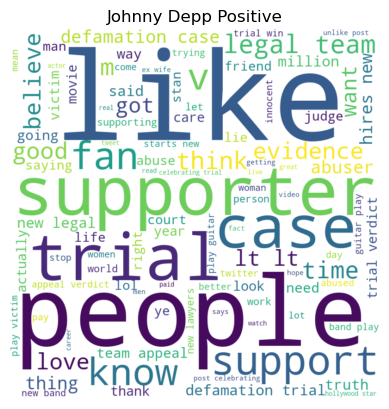

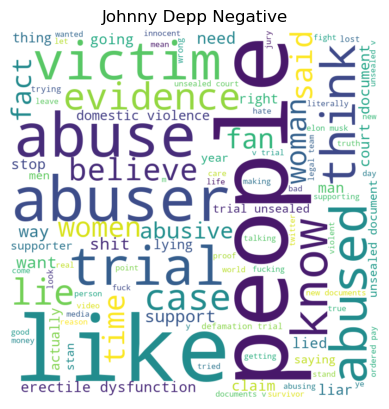

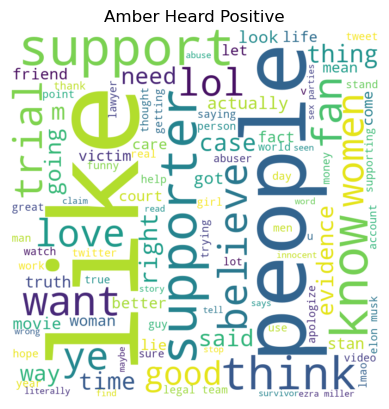

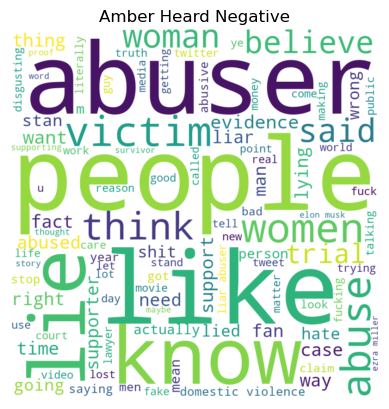

In [4]:
# Create three new DataFrames from the original DataFrame, one for each sentiment category (positive, negative, neutral)
df_jd_pos = df[(df['sentiment_score'] > 0) & (df['Johnny Depp sentiment'] == 'positive')]
df_jd_neg = df[(df['sentiment_score'] < 0) & (df['Johnny Depp sentiment'] == 'negative')]
# df_jd_neu = df[(df['sentiment_score'] == 0) & (df['Johnny Depp sentiment'] == 'neutral')]
df_ah_pos = df[(df['sentiment_score'] > 0) & (df['Amber Heard sentiment'] == 'positive')]
df_ah_neg = df[(df['sentiment_score'] < 0) & (df['Amber Heard sentiment'] == 'negative')]
# df_ah_neu = df[(df['sentiment_score'] == 0) & (df['Amber Heard sentiment'] == 'neutral')]

# Print the number of tweets in each category
print("Number of Johnny Depp positive tweets:", len(df_jd_pos))
print("Number of Johnny Depp negative tweets:", len(df_jd_neg))
# print("Number of Johnny Depp neutral tweets:", len(df_jd_neu))
print("Number of Amber Heard positive tweets:", len(df_ah_pos))
print("Number of Amber Heard negative tweets:", len(df_ah_neg))
# print("Number of Amber Heard neutral tweets:", len(df_ah_neu))

print("")

# Print the number of percentage of tweets in each category
print("Percentage of Johnny Depp positive tweets:", round((len(df_jd_pos)/len(df))*100,2), "%")
print("Percentage of Johnny Depp negative tweets:", round((len(df_jd_neg)/len(df))*100,2),"%")
# print("Number of Johnny Depp neutral tweets:", round((len(df_jd_neu)/len(df))*100,2),"%")
print("Percentage of Amber Heard positive tweets:", round((len(df_ah_pos)/len(df))*100,2),"%")
print("Percentage of Amber Heard negative tweets:", round((len(df_ah_neg)/len(df))*100,2),"%")
# print("Number of Amber Heard neutral tweets:", round((len(df_ah_neu)/len(df))*100,2),"%")

# Generate word clouds for each sentiment category
stopwords_2= set(["n","t","nt","s"])
wordcloud_jd_pos = WordCloud(stopwords =stopwords_2, width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_jd_pos['tokens'].sum()))
plt.imshow(wordcloud_jd_pos, interpolation='bilinear')
plt.title("Johnny Depp Positive")
plt.axis("off")
plt.show()

wordcloud_jd_neg = WordCloud(stopwords =stopwords_2, width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_jd_neg['tokens'].sum()))
plt.imshow(wordcloud_jd_neg, interpolation='bilinear')
plt.title("Johnny Depp Negative")
plt.axis("off")
plt.show()

# wordcloud_jd_neu = WordCloud(width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_jd_neu['tokens'].sum()))
# plt.imshow(wordcloud_jd_neu, interpolation='bilinear')
# plt.title("Johnny Depp Neutral")
# plt.axis("off")
# plt.show()

wordcloud_ah_pos = WordCloud(stopwords =stopwords_2, width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_ah_pos['tokens'].sum()))
plt.imshow(wordcloud_ah_pos, interpolation='bilinear')
plt.title("Amber Heard Positive")
plt.axis("off")
plt.show()

wordcloud_ah_neg = WordCloud(stopwords =stopwords_2, width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_ah_neg['tokens'].sum()))
plt.imshow(wordcloud_ah_neg, interpolation='bilinear')
plt.title("Amber Heard Negative")
plt.axis("off")
plt.show()

# wordcloud_ah_neu = WordCloud(width=800, height=800, background_color='white', max_words=100, contour_width=3, contour_color='steelblue').generate(' '.join(df_ah_neu['tokens'].sum()))
# plt.imshow(wordcloud_ah_neu, interpolation='bilinear')
# plt.title("Amber Heard Neutral")
# plt.axis("off")
# plt.show()